<a href="https://colab.research.google.com/github/wasimkhan33/Deep-Learning-Capstone-Face-Emotion-Recognition/blob/main/Deep_Learning_Capstone_Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source - https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. Each image corresponds to a facial expression in one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains approximately 36K images

- Dataset is converted  into raw images and splitted in multiple folders which are train and validation folders.
- 80% of our images are contained inside the train folder, and the last 20% are inside the validation folder.


# **Importing Libraries**

Importing the required python libraries like numpy, seaborn, matplotlib, tensorflow

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2
import keras
from keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Visualization**

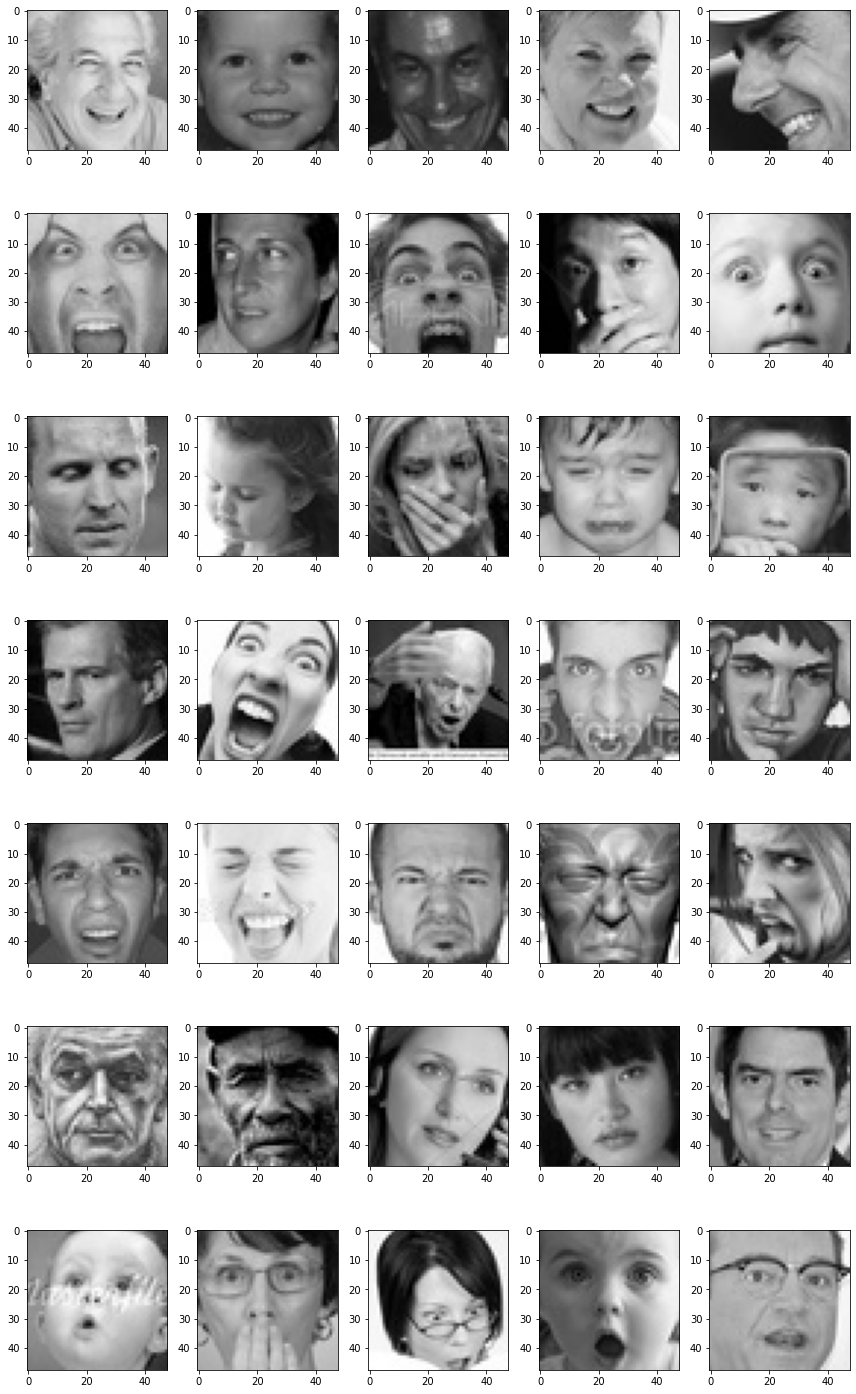

In [ ]:
# size of the image: So each image will be reduced to a size of 48*48 pixels
pic_size = 48  

# input path for the images
base_path = "/content/drive/MyDrive/Colab Notebooks/Capstone 5/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

- However all this diversity of images will contribute to make a more generalizable model.

The dataset has seven categories of expressions.

In [ ]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

7174 happy images
4103 fear images
4938 sad images
3993 angry images
436 disgust images
4982 neutral images
3205 surprise images


- The image expressions in our training dataset are pretty balanced, except for the 'disgust' category.

# **Setup the data generators**

Now we will generate training and testing (validation) batches.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# number of images to feed into the NN for every batch
batch_size = 128

datagen_train = ImageDataGenerator()
datagen_validation = ImageDataGenerator()

train_generator = datagen_train.flow_from_directory(base_path + "train",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = datagen_validation.flow_from_directory(base_path + "validation",
                                                    target_size=(pic_size,pic_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28831 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


- Deep learning models are trained by being fed with batches of data. Keras has a very useful class to automatically feed data from a directory: ImageDataGenerator.

As of now we have imported libraries, got dataset, and created train and test images. Now its time to move to another important step which is building the CNN Model.

# **Building the CNN Model.**

Now let's define the architecture of our CNN:

In [ ]:
# from keras.layers.convolutional import Conv2D

In [ ]:
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential

In [ ]:
# from keras.optimizers import Adam,SGD,RMSprop

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


We define our CNN with the following global architecture:

*   4 convolutional layers
*   2 fully connected layers

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image


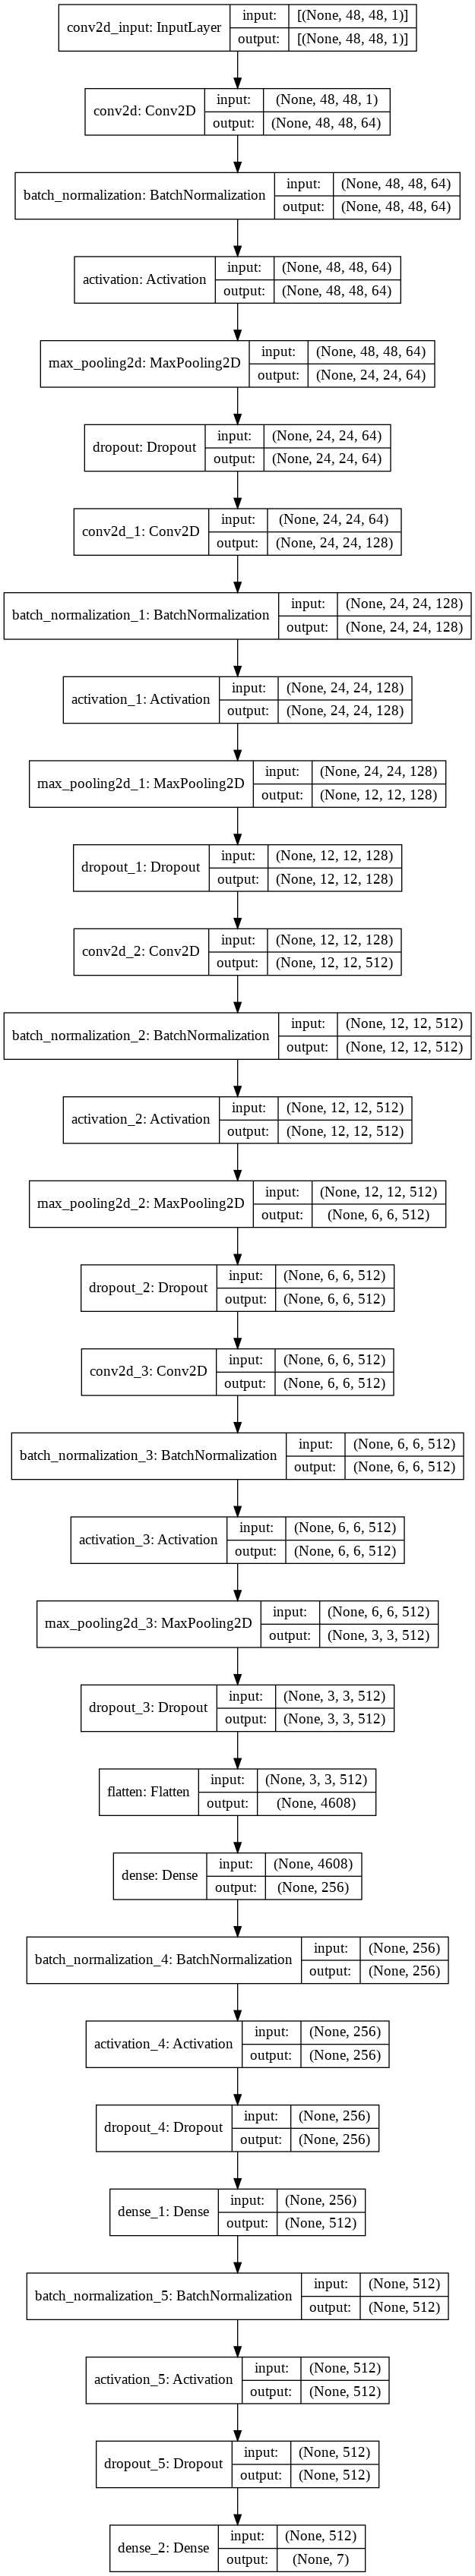

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

# **Train the model**

Now it’s time to train the model and evaluate the results.

In [ ]:
# number of epochs to train the NN
epochs = 50

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

history = model.fit_generator(generator=train_generator,
                                steps_per_epoch=train_generator.n//train_generator.batch_size,
                                epochs=epochs,
                                validation_data = validation_generator,
                                validation_steps = validation_generator.n//validation_generator.batch_size,
                                callbacks=callbacks_list
                                )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
225/225 [==============================] - 1429s 6s/step - loss: 2.0083 - accuracy: 0.2331 - val_loss: 1.7392 - val_accuracy: 0.2976
Epoch 2/50
225/225 [==============================] - 1296s 6s/step - loss: 1.8577 - accuracy: 0.2818 - val_loss: 1.6637 - val_accuracy: 0.3536
Epoch 3/50
225/225 [==============================] - 1714s 8s/step - loss: 1.7504 - accuracy: 0.3315 - val_loss: 1.6255 - val_accuracy: 0.3786
Epoch 4/50
225/225 [==============================] - 1740s 8s/step - loss: 1.6705 - accuracy: 0.3622 - val_loss: 1.5823 - val_accuracy: 0.3945
Epoch 5/50
225/225 [==============================] - 1363s 6s/step - loss: 1.6088 - accuracy: 0.3838 - val_loss: 1.5667 - val_accuracy: 0.4114
Epoch 6/50
225/225 [==============================] - 1318s 6s/step - loss: 1.5625 - accuracy: 0.3987 - val_loss: 1.4736 - val_accuracy: 0.4348
Epoch 7/50
225/225 [==============================] - 1432s 

- It took around 23-24 hours for all epochs.
- Our best model managed to obtain a  accuracy of approximately 74% on the dataset by running 50 epochs.which is quite good.

**Saving Model**

In [ ]:
model.save('model1.h5')

# **Plotting Accuracy & Loss to analyze the results**

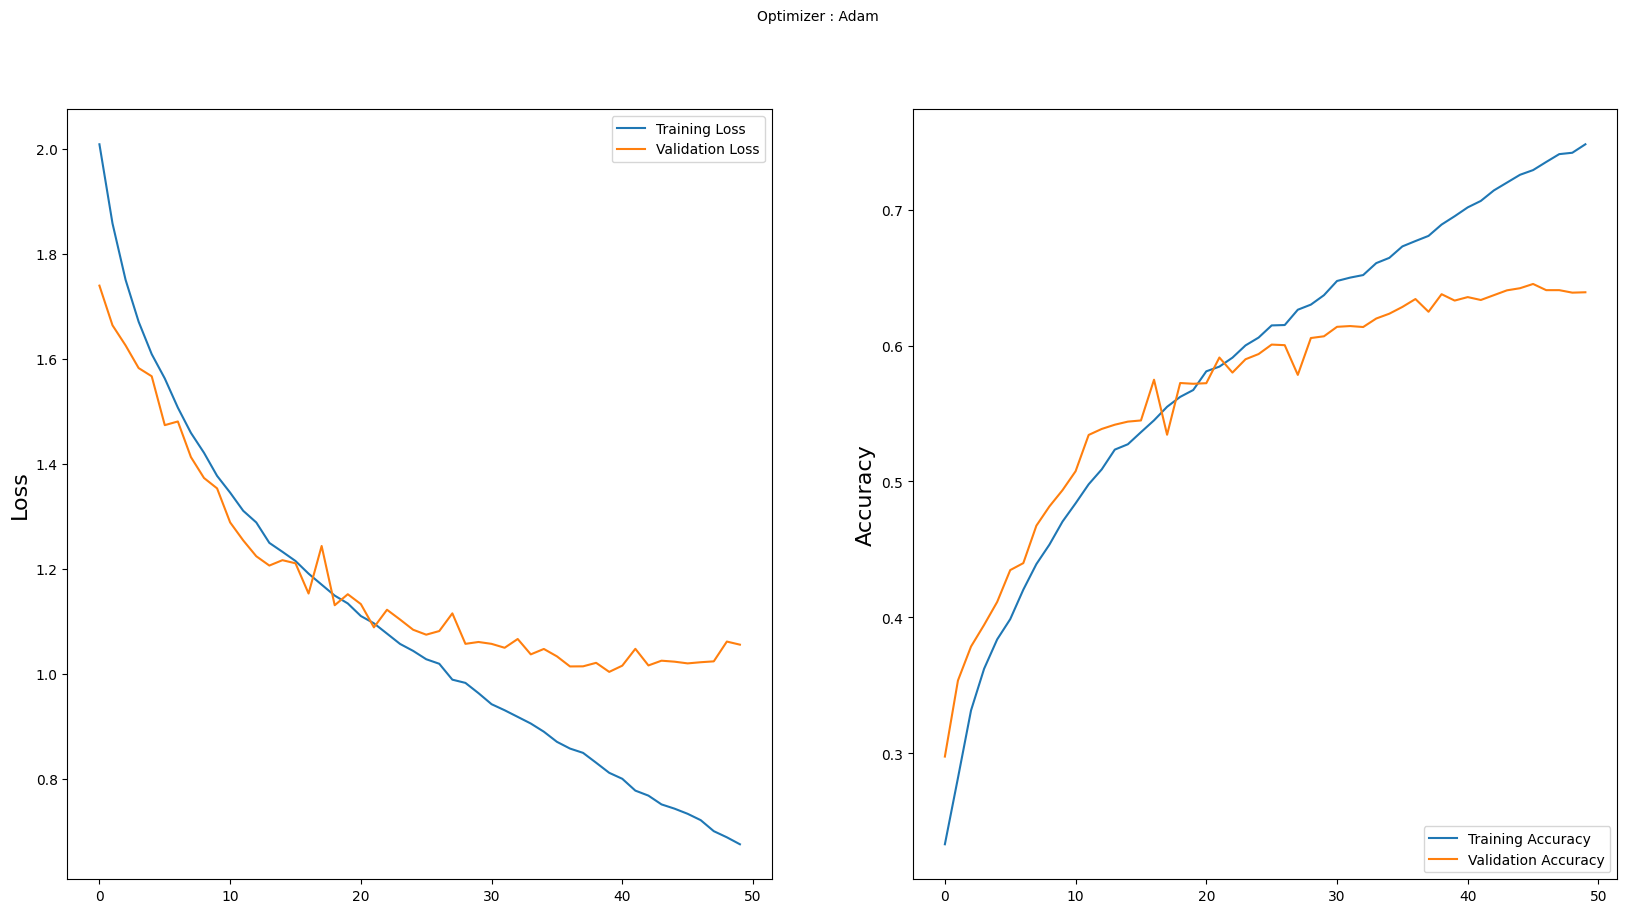

In [ ]:
# Plotting Accuracy & Loss

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

- The training gave the accuracy of 74% and val_accuracy of 63%. It seems good. So, I save the model but the detection i got from live video was average

Finally we can plot the confusion matrix in order to see how our model classified the images:

In [ ]:
# !pip install -U scikit-learn

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools


<Figure size 640x480 with 0 Axes>

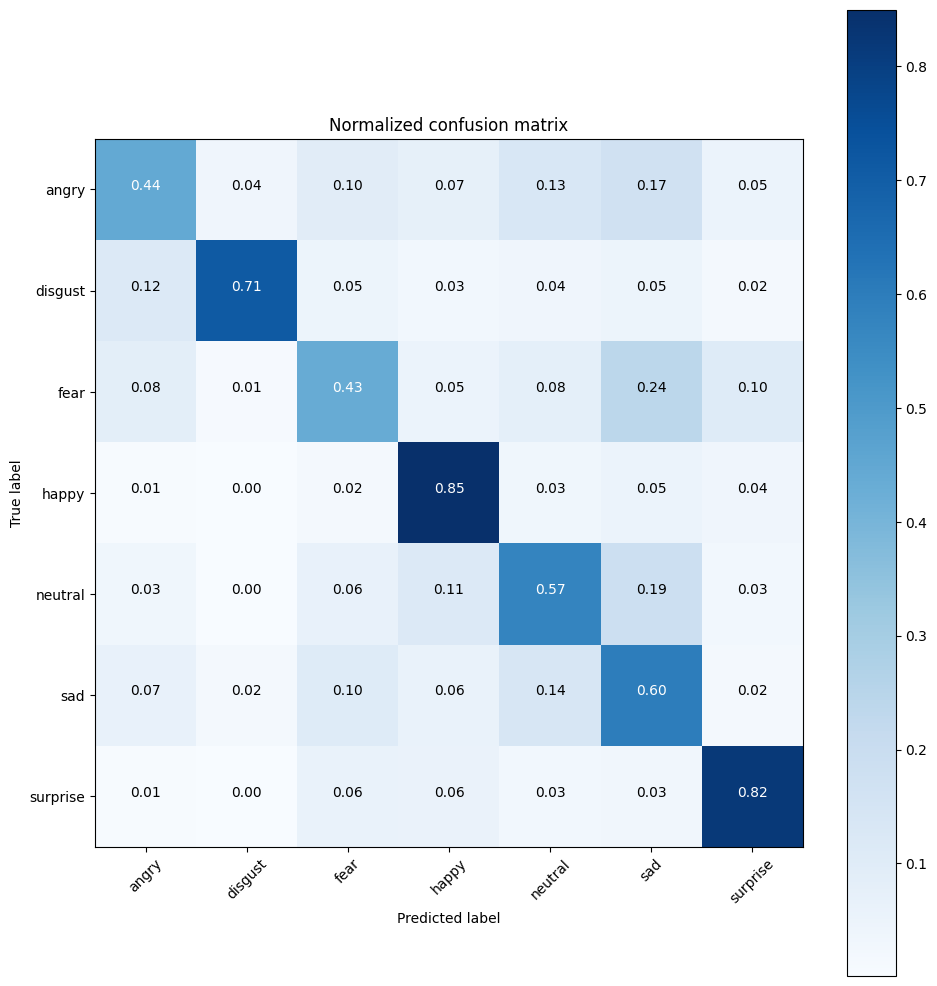

In [ ]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes
class_names = validation_generator.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

Our model is very good for predicting happy and surprised faces. However it predicts quite poorly feared faces maybe because it confuses them with sad faces.

# **Real-time predictions**

First let’s create a class that will give us the predictions of our previously trained model:

loading the model and weights and making Predictions.

In [ ]:
from tensorflow.keras.models import model_from_json #method to load the model
class FacialExpressionModel(object):
    EMOTIONS_LIST = ["Angry", "Disgust",
                    "Fear", "Happy",
                    "Neutral", "Sad",
                    "Surprise"]
    def __init__(self, model_json_file, model_weights_file):  # init method which takes the model.json file and the model weights file which is in .h5 format
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)
        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()
    def predict_emotion(self, img):
        self.preds = self.loaded_model.predict(img)
        return FacialExpressionModel.EMOTIONS_LIST[np.argmax(self.preds)]

- In the above code we have first imported model_from_json function which helps us to import the model from a json file

Implementing a camera class that will do the following operations

In [ ]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model

Also save the model in json format with its weights also saved.

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Now we will get the frames of the video and will perform the predictions

In [ ]:
import cv2
import numpy as np


In [ ]:
facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model.json", "model1.h5")
font = cv2.FONT_HERSHEY_SIMPLEX

class VideoCamera(object):
    def __init__(self):
        self.video = cv2.VideoCapture(0)
    def __del__(self):
        self.video.release()
    # returns camera frames along with bounding boxes and predictions
    def get_frame(self):
        _, fr = self.video.read()
        gray_fr = cv2.cvtColor(fr, cv2.COLOR_BGR2GRAY)
        faces = facec.detectMultiScale(gray_fr, 1.3, 5)
        for (x, y, w, h) in faces:
            fc = gray_fr[y:y+h, x:x+w]
            roi = cv2.resize(fc, (48, 48))
            pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])
            cv2.putText(fr, pred, (x, y), font, 1, (255, 255, 0), 2)
            cv2.rectangle(fr,(x,y),(x+w,y+h),(255,0,0),2)
        return fr

- we are importing the OpenCV Module. After this we are setting the CascadeClassifier with Haar Cascade Classifiers that is used to detect features by superimposing predefined patterns over face segments and are used as XML file

Make the function for calling the above code and showing the output video

In [ ]:
# gen takes camera as parameter.
def gen(camera):  
    while True:
        frame = camera.get_frame()
        cv2.imshow('Facial Expression Recognization',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cv2.destroyAllWindows()

We have added if condition that if key ‘q’ is presses then loop will be break and the output screen will be destroyed using destroyAllWindows() function.

Run all the code above by calling the gen function.

In [ ]:
gen(VideoCamera())


- we have called the gen function and we have passed the VideoCamera class object as the parameter
- Finally when we run the above line of code the output screen will open showing the live prediction